In [2]:
import matplotlib
import numpy as np
matplotlib.rc('xtick', labelsize=15)
matplotlib.rc('ytick', labelsize=15)
matplotlib.rc('axes', titlesize=15)
matplotlib.rc('axes', labelsize=15)
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [3]:
class MassSpring:
    def __init__(self, m, b, k):
        self.m = m
        self.b = b 
        self.k = k

In [4]:
def closed_loop(t, x, robot, gains, e_i=0):
    x1 = x[0]
    x2 = x[1]
    xd = 1
    xd_dot = 0
    e = xd - x1
    e_dot = xd_dot - x2
    F = gains['kp']*e + gains['kd']*e_dot + gains['ki']*e_i
    dx1dt = x2; 
    dx2dt = -(b/m)*x2 -(k/m)*x1 + F
    return np.array([dx1dt, dx2dt]), e

In [5]:
def solve_equation(x, t, delta_t, system, gains):
    x_plot = []
    e_i = 0
    for i in range(t.size):
        k1, e1 = closed_loop(t[i], x, system, gains, e_i)
        k2, e2 = closed_loop(t[i] + 0.5*delta_t, x + 0.5*delta_t*k1, system, gains, e_i)
        k3, e3 = closed_loop(t[i] + 0.5*delta_t, x + 0.5*delta_t*k2, system, gains, e_i)
        k4, e4 = closed_loop(t[i] + delta_t, x + delta_t*k3, system, gains, e_i)
        x = x + (delta_t/6)*(k1+2*k2+2*k3+k4)
        e_i = e_i + (delta_t/6)*(e1+2*e2+2*e3+e4)
        x_plot.append(x)
    return np.array(x_plot)

In [6]:

def plot(t, y, title, x_label, y_label, legends, axis_lim=False):
    axis_font = {'fontname':'Arial', 'size':'15'}   
    plt.figure(figsize=(10,5))
    for value in y:
        plt.plot(t, value)
    plt.title(title)
    plt.xlabel(x_label, **axis_font)
    plt.ylabel(y_label, **axis_font)
    plt.legend(legends, fontsize=15)
    if axis_lim:
        plt.xlim(min(t), max(t))
        plt.ylim(-0.5, 1.5)
    plt.show()

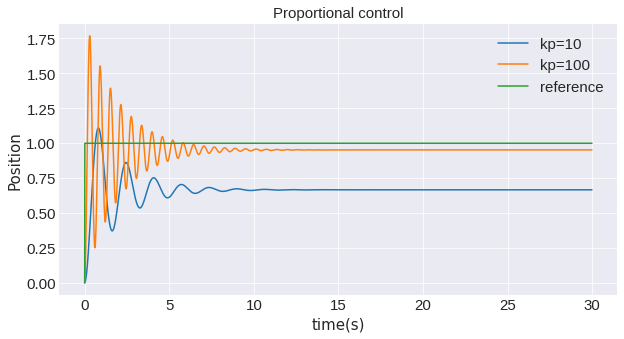

In [10]:
m = 2
b = 2
k = 10
t0 = 0
tf = 30
delta_t = 1/100
t = np.arange(t0, tf, delta_t)
system = MassSpring(m, b, k)
gains = {'kp': 10, 'kd': 0, 'ki': 0}
x0 = np.array([0, 0])
x_plot_kd1 = solve_equation(x0, t, delta_t, system, gains)
gains['kp'] = 100
x_plot_kd2 = solve_equation(x0, t, delta_t, system, gains)
xd = np.ones(t.shape)
xd[0] = 0
xdponto = 0*np.arange(t0, tf, delta_t)
plot(t, [x_plot_kd1[:,0], x_plot_kd2[:,0], xd], 'Proportional control', 'time(s)', 
    'Position', ['kp=10', 'kp=100', 'reference'])